# Import Libraries

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare Data

In [153]:
# Create dataframe
data = pd.read_csv('https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-final-Ava/main/data/Queried_Data/interestOverTime_March2023.csv')
df = pd.DataFrame(data)

# Prepare variables
df['Date'] = pd.to_datetime(df['Date'])
df['Volume'] = df['Volume'].astype(int)

x = df['Date']
y = df['Volume']

# Display data
df.head(232)

,Date,Volume
0,2004-01-01,28
1,2004-02-01,30
2,2004-03-01,27
3,2004-04-01,24
4,2004-05-01,21
...,...,...
226,2022-11-01,43
227,2022-12-01,37
228,2023-01-01,46
229,2023-02-01,48


# Establish Subsets

In [154]:
before_crash = df[df['Date'] < '2008-08-01']
after_crash = df.loc[(df['Date'] >= '2008-08-01') & (df['Date'] < '2020-02-01')]
pandemic = df[df['Date'] >= '2020-02-01']

# Prepare Regression Lines

In [155]:
before_crash_fit = np.polyfit(before_crash.index, before_crash['Volume'], 1)
before_crash_line = np.poly1d(before_crash_fit)

after_crash_fit = np.polyfit(after_crash.index, after_crash['Volume'], 1)
after_crash_line = np.poly1d(after_crash_fit)

pandemic_fit = np.polyfit(pandemic.index, pandemic['Volume'], 1)
pandemic_line = np.poly1d(pandemic_fit)

# Plot Graph

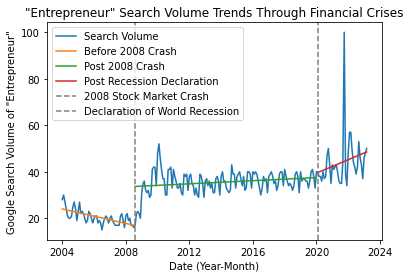

In [156]:
# Plot queried data
plt.plot(x, y, label='Search Volume')

# Plot regression lines
plt.plot(before_crash['Date'], before_crash_line(before_crash.index), label='Before 2008 Crash')
plt.plot(after_crash['Date'], after_crash_line(after_crash.index), label='Post 2008 Crash')
plt.plot(pandemic['Date'], pandemic_line(pandemic.index), label='Post Recession Declaration')

# Plot events
plt.axvline(x=pd.to_datetime('2008-08-01'), color='gray', linestyle='--', label='2008 Stock Market Crash')
plt.axvline(x=pd.to_datetime('2020-02-01'), color='gray', linestyle='--', label='Declaration of World Recession')

# Add legend and labels
plt.legend()
plt.title('"Entrepreneur" Search Volume Trends Through Financial Crises')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Google Search Volume of "Entrepreneur"')

# Generate graph
plt.show()